In [1]:
from VX_robot import VX_robot
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import audiofile as af

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


## Example - "Red Wheel" (50, 100 and 200 Hz)

In [2]:
inputFile = 'audios\\redwheel.wav'
robotFreqs =[50,100,200]

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

for rf in robotFreqs:
    y = VX_robot(x,fs=fs,robotFreq=rf,normOrigPeak=True)
    af.write(auxName+'_robot_'+str(rf)+'_Hz.wav',y,fs)

Elapsed time is 0.007086 seconds.
Elapsed time is 0.013613 seconds.
Elapsed time is 0.029905 seconds.


## Example - Flute

Elapsed time is 0.018288 seconds.


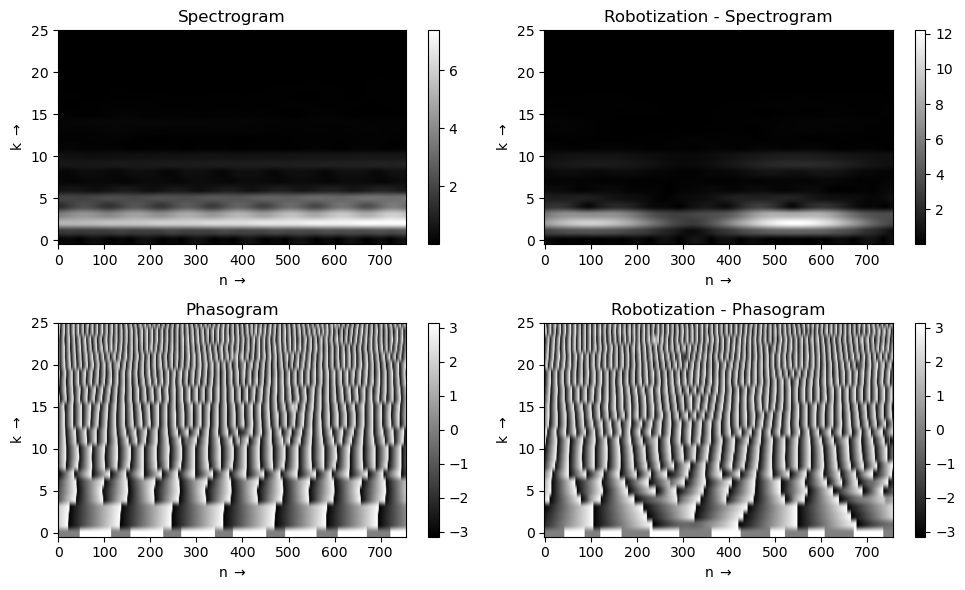

In [3]:
inputFile = 'audios\\flute2.wav'

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y = VX_robot(x)
af.write(auxName+'_robot.wav',y,fs)

lenX = range(3000,3756)
lenFFT = 256
win= sig.windows.hann(256,False)

X = np.zeros((len(lenX),lenFFT),dtype='complex128')
Y = np.zeros((len(lenX),lenFFT),dtype='complex128')

i=0
for n in lenX:
    grain = x[n:n+len(win)] * win
    X[i,:] = np.fft.fft(np.fft.fftshift(grain),n=lenFFT); # FFT
    grain = y[n:n+len(win)] * win
    Y[i,:] = np.fft.fft(np.fft.fftshift(grain),n=lenFFT); # FFT
    i = i+1

kcut=25
xmax =len(lenX)
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.imshow(np.abs(X.T), cmap='gray', extent=[-0.5, len(lenX)-0.5, -0.5, lenFFT-0.5], aspect='auto', origin='lower')
plt.title('Spectrogram')
plt.ylabel(r'k $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=kcut, xmax=xmax)
plt.colorbar()
plt.subplot(223)
plt.imshow(np.angle(X.T), cmap='gray', extent=[-0.5, len(lenX)-0.5, -0.5, lenFFT-0.5], aspect='auto', origin='lower')
plt.title('Phasogram')
plt.ylabel(r'k $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=kcut, xmax=xmax)
plt.colorbar()
plt.subplot(222)
plt.imshow(np.abs(Y.T), cmap='gray', extent=[-0.5, len(lenX)-0.5, -0.5, lenFFT-0.5], aspect='auto', origin='lower')
plt.title('Robotization - Spectrogram')
plt.ylabel(r'k $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=kcut, xmax=xmax)
plt.colorbar()
plt.subplot(224)
plt.imshow(np.angle(Y.T), cmap='gray', extent=[-0.5, len(lenX)-0.5, -0.5, lenFFT-0.5], aspect='auto', origin='lower')
plt.title('Robotization - Phasogram')
plt.ylabel(r'k $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=kcut, xmax=xmax)
plt.colorbar()

plt.tight_layout()

plt.show()


Elapsed time is 0.021610 seconds.


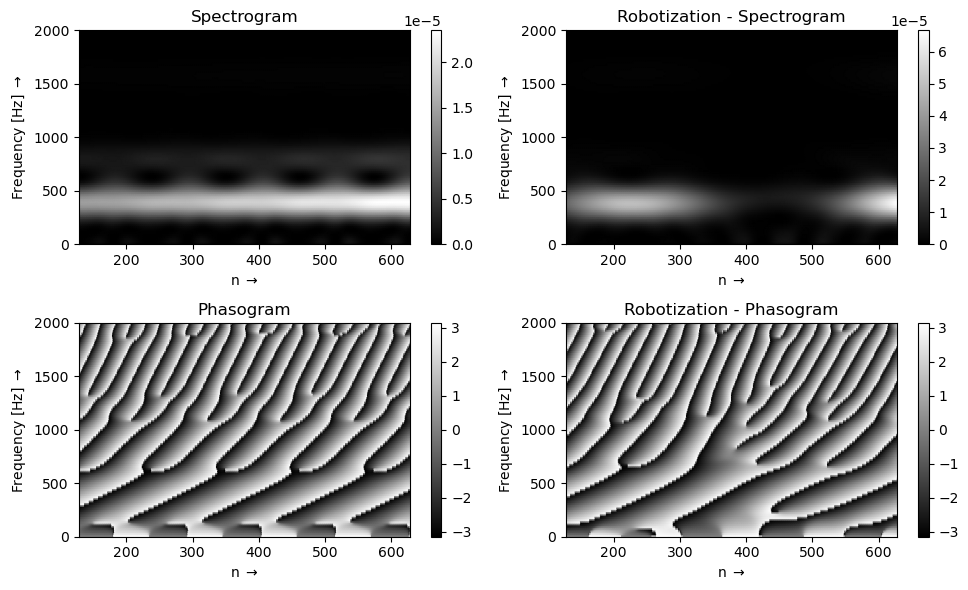

In [4]:
inputFile = 'audios\\flute2.wav'

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y = VX_robot(x)
af.write(auxName+'_robot.wav',y,fs)

lenX = range(3000,3756)
lenFFT = 2048
win= sig.windows.hann(256,False)
fx, tx, Sxx = sig.spectrogram(x[lenX], window=win, nfft=lenFFT, noverlap=len(win)-1,fs=fs)
fxph, txph, Sxxph = sig.spectrogram(x[lenX], window=win, nfft=lenFFT, noverlap=len(win)-1,fs=fs,mode='angle')
fy, ty, Syy = sig.spectrogram(y[lenX], window=win, nfft=lenFFT, noverlap=len(win)-1,fs=fs)
fyph, typh, Syyph = sig.spectrogram(y[lenX], window=win, nfft=lenFFT, noverlap=len(win)-1,fs=fs,mode='angle')

fcut=2000
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.pcolormesh(tx*fs, fx, Sxx, shading='gouraud',cmap='gray')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]'+r' $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=fcut)
plt.colorbar()
plt.subplot(223)
plt.pcolormesh(txph*fs, fxph, Sxxph, shading='gouraud',cmap='gray')
plt.title('Phasogram')
plt.ylabel('Frequency [Hz]'+r' $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=fcut)
plt.colorbar()
plt.subplot(222)
plt.pcolormesh(ty*fs, fy, Syy, shading='gouraud',cmap='gray')
plt.title('Robotization - Spectrogram')
plt.ylabel('Frequency [Hz]'+r' $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=fcut)
plt.colorbar()
plt.subplot(224)
plt.pcolormesh(typh*fs, fyph, Syyph, shading='gouraud',cmap='gray')
plt.title('Robotization - Phasogram')
plt.ylabel('Frequency [Hz]'+r' $\rightarrow$')
plt.xlabel(r'n $\rightarrow$')
plt.axis(ymax=fcut)
plt.colorbar()
plt.tight_layout()
plt.show()